# Lab 4
## Variant 4

1. Відповідно до номера в журналі академічної групи обрати номер індивідуального завдання (таблиця 2.1).
2. Набрати рівняння за допомогою мови LaTeX в клітинці блокнота.
3. Побудувати кожну лінію на окремому графіку, розмістивши їх поруч:
  - всі прямі повинні бути різного кольору, але не використовувати системну послідовність кольорів (синій, помаранчевий, зелений...);
  - всі прямі повинні мати різний тип ліній (пунктирна, точка тире тощо);
  - всі графіки повинні мати сумісну вісь ординат;
  - кожен графік повинен мати підпис.
4. Розмістити всі лінії на одному рисунку.
  - всі прямі повинні бути різного кольору, але не використовувати системну послідовність кольорів (синій, помаранчевий, зелений...);
  - всі прямі повинні мати різний тип ліній (пунктирна, точка тире тощо);
  - підібрати масштаб таким чином, щоб всі три точки перетину прямих були в області видимості;
  - додати легенду на графік; - додати сітку, в якій задати колір та тип ліній; –змінити розмір рисунку (наприклад, 8×16 дюймів) та
  розподільчу здатність (наприклад, 100 dpi);
  - зробити підписи рівнянь прямих вздовж лінії з відповідним
  нахилом;
  - додати підписи осей та назву графіку;
  - заповнити кольором область, що утворена перетином всіх прямих (використовуйте метод fill_between).
1. За допомогою підмодуля numpy.linalg знайти точки перетину всіх пар прямих, відмітити їх та зробити відповідні вказівки на графіку.
2. Зберегти отримані рисунки у форматах .jpg, .png, .svg.
3. Зробити висновки про те, чим відрізняються рисунки в кожному з форматів (розмір, наявність артефактів, вид вмісту файлу).
4. Розмістити створений блокнот на GitHub.

$
\begin{cases}
  10.2x_1 - 3.2x_2 = 149 \\
  -5.8x_1 + 16x_2 = 83 \\
  10.3x_1 + 7.3x_2 = 234 \\
\end{cases}
$

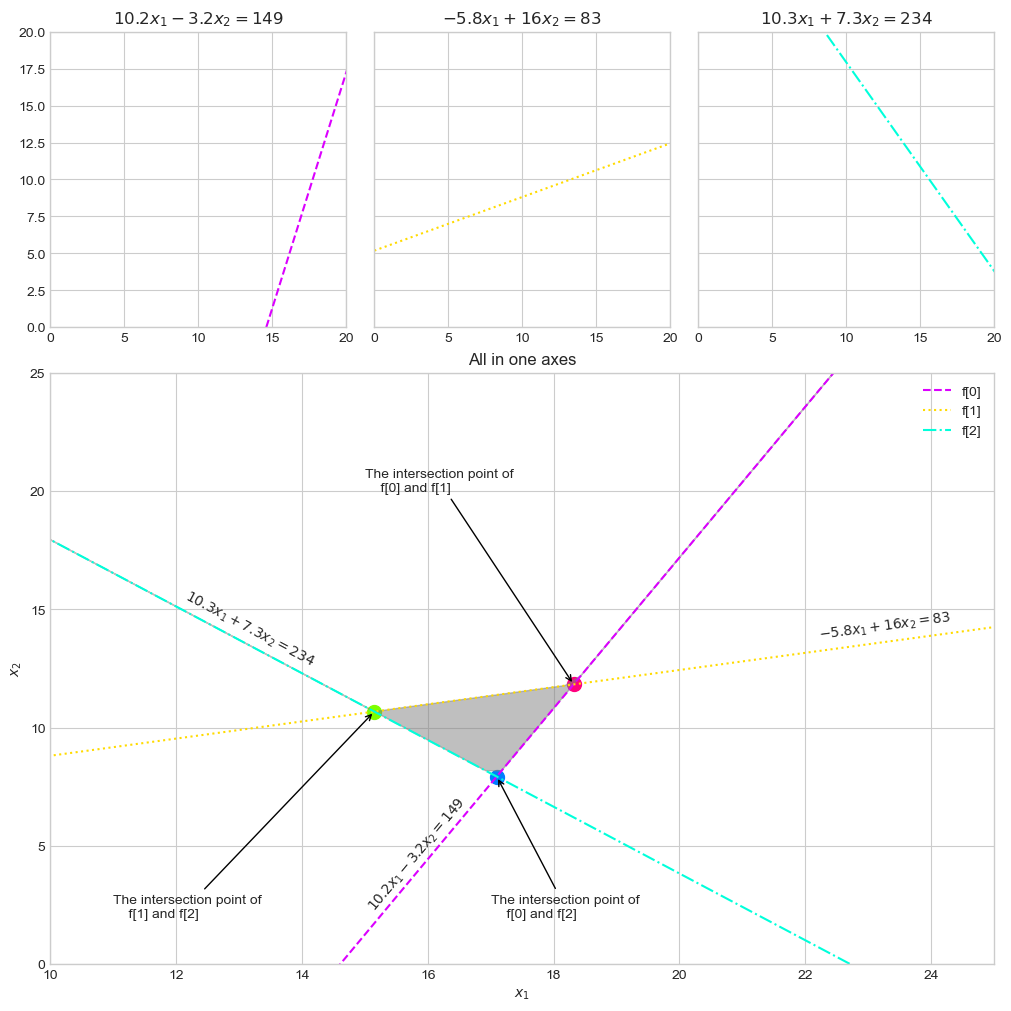

In [160]:
import matplotlib.pyplot as plt
import numpy as np

# Solve the system of linear equations
A = np.array([
    [10.2, -3.2],
    [-5.8, 16],
    [10.3, 7.3]
])
b = np.array([149, 83, 234])

# intersection points
its = np.array([
    np.linalg.solve(A[:2], b[:2]),
    np.linalg.solve(A[[0, 2]], b[[0, 2]]),
    np.linalg.solve(A[1:], b[1:])
])
    

# Linspace
x1 = np.linspace(0, 25, 100)

# Lists
x2 = np.array([
    (149 - 10.2 * x1) / -3.2,
    (83 + 5.8 * x1) / 16,
    (234 - 10.3 * x1) / 7.3
])

titles = [
    '$10.2x_1 - 3.2x_2 = 149$',
    '$-5.8x_1 + 16x_2 = 83$',
    '$10.3x_1 + 7.3x_2 = 234$'
]

titles_sm = ['f[0]', 'f[1]', 'f[2]']
colors = ['#DB00FF','#FFDB00', '#00FFDB']
dcolors = ['#FF007E','#007EFF', '#7EFF00']
styles = ['--', ':', '-.']

# Figure and grid
fig = plt.figure(layout="constrained", figsize=(10, 10))
gs = fig.add_gridspec(3, 3)

# Big axes
ax_4 = fig.add_subplot(
    gs[1:, :], 
    xlabel = '$x_1$', ylabel = '$x_2$', 
    xlim = (10, 25), ylim = (0, 25),
    title = 'All in one axes',
) 

# Plot
for i in range(3):
    # Small axes in the first row
    ax = fig.add_subplot(
        gs[0, i],
        title = titles[i],
        xlim = (0, 20), ylim = (0, 20),
    )
    if i != 0:
        ax.set_yticklabels([])
    
    # Plot on the small axes
    ax.plot(
        x1, x2[i],
        color = colors[i],
        linestyle = styles[i]
    )
    
    # Plot on the big axes
    ax_4.plot(
        x1, x2[i], 
        color = colors[i], linestyle = styles[i], 
        label = titles_sm[i]
    )
    
    # Draw intersection point
    ax_4.scatter(its[i, 0], its[i, 1], color = dcolors[i], s = 100)
    
    
# Show legend
ax_4.legend()

# Lower and upper bound
lb = np.maximum(x2[0], x2[2])
ub = np.maximum(x2[1], lb)

# Fill the area
ax_4.fill_between(x1, lb, ub, color='grey', alpha=0.5)

# Annotate intersection point
ax_4.annotate(
    'The intersection point of\n    f[0] and f[1]', xy=(its[0]), xytext=(15, 20),
    arrowprops=dict(arrowstyle="->"),
)
ax_4.annotate(
    'The intersection point of\n    f[0] and f[2]', xy=(its[1]), xytext=(17, 2),
    arrowprops=dict(arrowstyle="->"),
)
ax_4.annotate(
    'The intersection point of\n    f[1] and f[2]', xy=(its[2]), xytext=(11, 2),
    arrowprops=dict(arrowstyle="->"),
)

# Annotate the lines
def draw_text(t: str, x1, x2, x1_t: float):
    idx = np.where(abs(x1 - x1_t) < 0.5)[0].mean().round().astype(int)
    x2_t = x2[idx] + 0.5
    x1_t = x1[idx]
    
    tan = (x2[idx+1] - x2[idx-1]) / (x1[idx+1] - x1[idx-1])
    angle = np.arctan(tan) * 180 / np.pi
    
    ax_4.text(x1_t, x2_t, t, fontsize=10,
              rotation=angle, rotation_mode='anchor',
              transform_rotates_text=True)

draw_text(titles[0], x1, x2[0], 15)
draw_text(titles[1], x1, x2[1], 22)
draw_text(titles[2], x1, x2[2], 12)